# Table of Content:
* [Import Libraries](#1st-bullet)
* [Data Wrangling](#2nd-bullet)
    * [Assess Data content](#3rd-bullet)
    * [Data Cleaning](#4th-bullet)
* [Data Analysis and visualizations](#5th-bullet)
    * [Univariate Analysis](#6th-bullet)
    * [Bivariate Analysis](#7th-bullet)
    * [Multivariate Analysis](#8th-bullet)
* [Model Development](#9th-bullet)
    * [Regression](#10th-bullet)
    * [Classification](#11th-bullet)
    * [Clustering](#12th-bullet)


## Import all libraries to be used <a class="anchor" id="1st-bullet"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#import regression libraries
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import classification models and evaluation metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# import clustering libraries
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Data Wrangling <a class="anchor" id="2nd-bullet"></a>

In [2]:
# read the data csv file
df = pd.read_csv('MY2010-2014 Fuel Consumption Ratings 5-cycle.csv')
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION in CITY (L/100 km),FUEL CONSUMPTION in HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


### Assess Data <a class="anchor" id="3rd-bullet"></a>

In [3]:
# check number of rows and columns
df.shape

(5359, 13)

In [4]:
# check for skewness and outliers
df.describe()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION in CITY (L/100 km),FUEL CONSUMPTION in HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
count,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000
mean,2012.014742,3.491901,5.962120,13.902650,9.932208,12.116328,25.168875,267.660198
std,1.404536,1.390957,1.872838,4.162894,2.807196,3.524127,6.956407,64.317040
min,2010.000000,1.000000,2.000000,4.500000,4.900000,4.700000,11.000000,108.000000
25%,2011.000000,2.400000,4.000000,11.000000,8.000000,9.700000,20.000000,221.000000
50%,2012.000000,3.500000,6.000000,13.200000,9.300000,11.400000,25.000000,260.000000
75%,2013.000000,4.600000,8.000000,16.000000,11.200000,13.900000,29.000000,305.000000
max,2014.000000,8.400000,16.000000,30.400000,20.800000,26.000000,60.000000,566.000000


In [5]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MODEL YEAR                           5359 non-null   int64  
 1   MAKE                                 5359 non-null   object 
 2   MODEL                                5359 non-null   object 
 3   VEHICLE CLASS                        5359 non-null   object 
 4   ENGINE SIZE (L)                      5359 non-null   float64
 5   CYLINDERS                            5359 non-null   int64  
 6   TRANSMISSION                         5359 non-null   object 
 7   FUEL TYPE                            5359 non-null   object 
 8   FUEL CONSUMPTION in CITY (L/100 km)  5359 non-null   float64
 9   FUEL CONSUMPTION in HWY (L/100 km)   5359 non-null   float64
 10  FUEL CONSUMPTION COMB (L/100 km)     5359 non-null   float64
 11  FUEL CONSUMPTION COMB (mpg)   

In [6]:
# check for missing data values
df.isna().any()

MODEL YEAR                             False
MAKE                                   False
MODEL                                  False
VEHICLE CLASS                          False
ENGINE SIZE (L)                        False
CYLINDERS                              False
TRANSMISSION                           False
FUEL TYPE                              False
FUEL CONSUMPTION in CITY (L/100 km)    False
FUEL CONSUMPTION in HWY (L/100 km)     False
FUEL CONSUMPTION COMB (L/100 km)       False
FUEL CONSUMPTION COMB (mpg)            False
CO2 EMISSIONS (g/km)                   False
dtype: bool

In [7]:
# check number of years covered in data
df['MODEL YEAR'].unique()

array([2010, 2011, 2012, 2013, 2014], dtype=int64)

### Data Cleaning <a class="anchor" id="4th-bullet"></a>

In [8]:
# Convert the column names to title case
df.columns = df.columns.str.title()

# Print the modified DataFrame
print(df.columns)

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption In City (L/100 Km)',
       'Fuel Consumption In Hwy (L/100 Km)',
       'Fuel Consumption Comb (L/100 Km)', 'Fuel Consumption Comb (Mpg)',
       'Co2 Emissions (G/Km)'],
      dtype='object')


## Data Analysis <a class="anchor" id="5th-bullet"></a>

### Univariate Analysis <a class="anchor" id="6th-bullet"></a>

<Figure size 400x300 with 0 Axes>

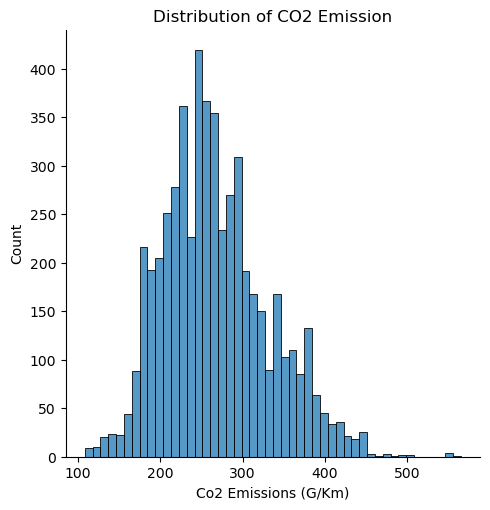

In [9]:
# Set the figure size
plt.figure(figsize=(4, 3))

# Plot the distribution of the 'Co2 Emissions (G/Km)' column
sns.displot(df["Co2 Emissions (G/Km)"])
plt.xlabel("Co2 Emissions (G/Km)")
plt.title('Distribution of CO2 Emission')

# Show the plot
plt.show()

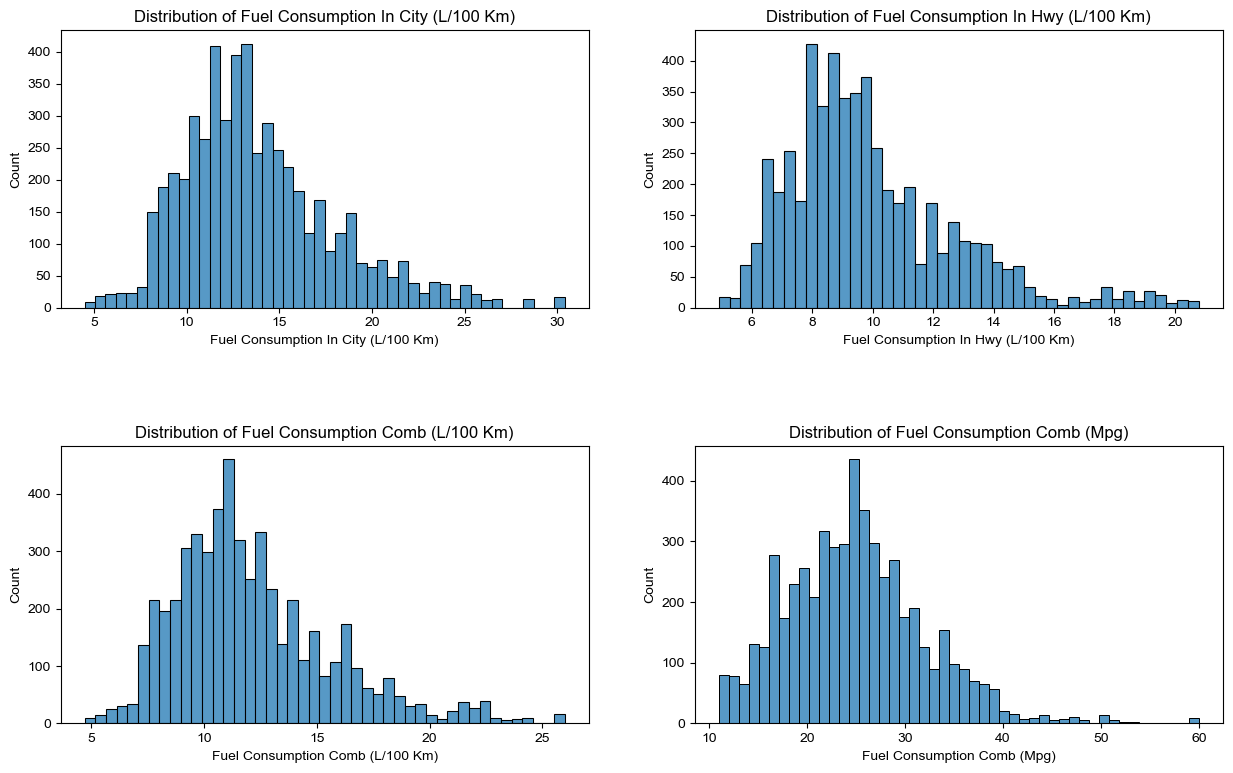

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
features = ['Fuel Consumption In City (L/100 Km)', 'Fuel Consumption In Hwy (L/100 Km)',
           'Fuel Consumption Comb (L/100 Km)', 'Fuel Consumption Comb (Mpg)']

for index, feature in enumerate(features):
    plt.subplot(2, 2, index+1)
    sns.histplot(x=df[feature])
    # plt.title(feature)
    plt.title('Distribution of ' + feature)
    # plt.xticks(rotation=90)

sns.set(rc = {'figure.figsize':(10, 4)})
plt.subplots_adjust(hspace=0.5)

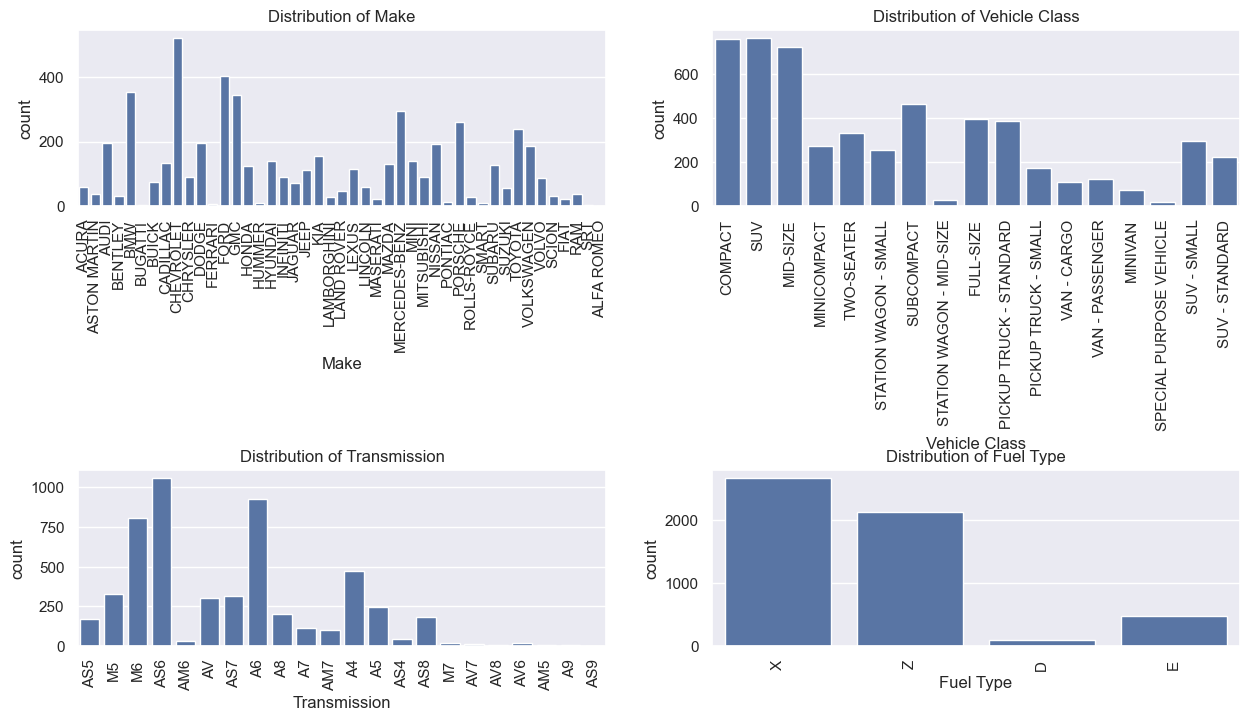

In [11]:
# List of column names to plot
column_names = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

# Set the figure size
plt.figure(figsize=(15, 8))

# Iterate over the list of column names
for i, column_name in enumerate(column_names):
    # Create a subplot for the current column
    plt.subplot(2, 2, i+1)
    
    # Plot the frequency of the values in the column
    sns.countplot(x=column_name, data=df, color="C0")
    
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Set the x-axis label
    plt.xlabel(column_name)
    plt.title('Distribution of ' + column_name)

# Show the plot
plt.subplots_adjust(hspace=1.5)
plt.show()

### Bivariate Analysis <a class="anchor" id="7th-bullet"></a>

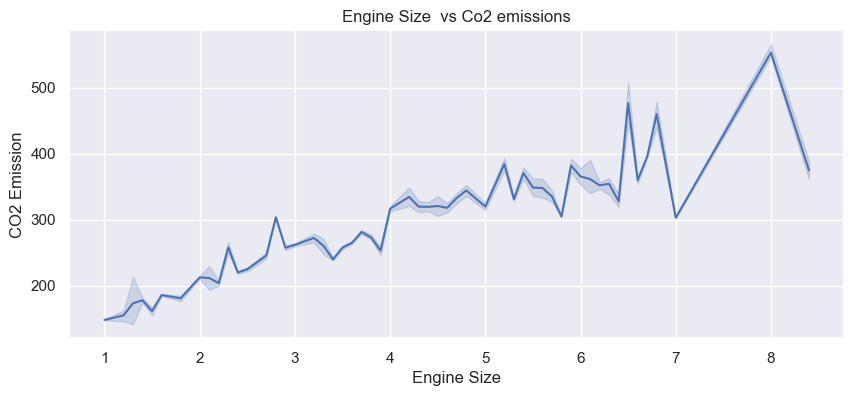

In [13]:
# plot relationship fuel type and Co2 emissions
sns.lineplot(x = df['Engine Size (L)'], y = df['Co2 Emissions (G/Km)'])
plt.title('Engine Size  vs Co2 emissions')
plt.ylabel('CO2 Emission')
plt.xlabel('Engine Size');

Text(0.5, 1.0, 'CO2 emission by Fuel Type')

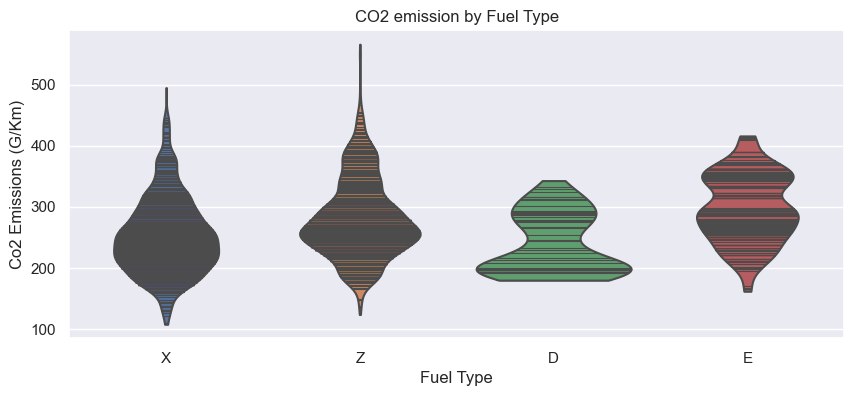

In [39]:
# plt.figure(figsize=(12, 8))
sns.violinplot(x='Fuel Type', y='Co2 Emissions (G/Km)', data=df, cut=0,
               inner='stick')
plt.title('CO2 emission by Fuel Type')

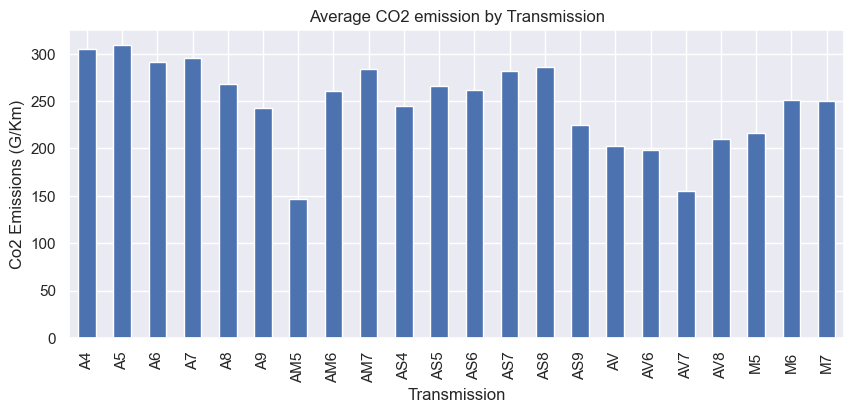

In [40]:
# plot distribution of co2 emissions by transmisson
df['Co2 Emissions (G/Km)'].groupby(df['Transmission']).mean().plot(kind='bar')
plt.title('Average CO2 emission by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Co2 Emissions (G/Km)');

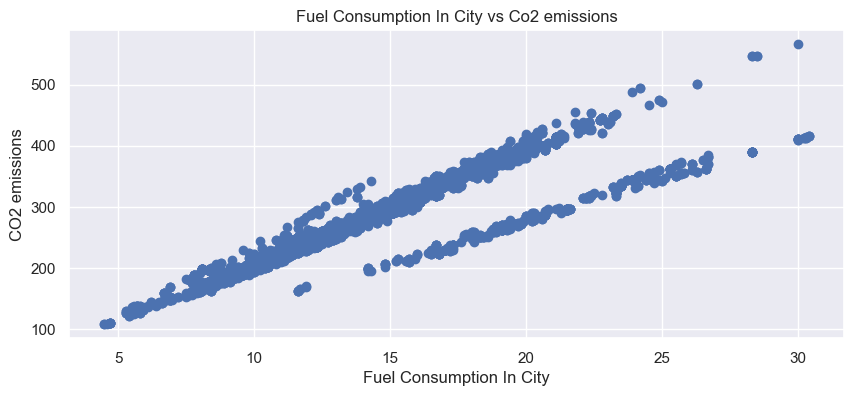

In [41]:
# plot relationship between Fuel consumption and Co2 emissions
plt.scatter(x = df['Fuel Consumption In City (L/100 Km)'], y = df['Co2 Emissions (G/Km)'])
plt.title('Fuel Consumption In City vs Co2 emissions')
plt.xlabel('Fuel Consumption In City')
plt.ylabel('CO2 emissions');

C:\Users\Chizzy\AppData\Local\Temp\ipykernel_7292\1377897270.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_mean = df.groupby('Model Year').mean()


Text(0.5, 1.0, 'Change in CO2 emission by year')

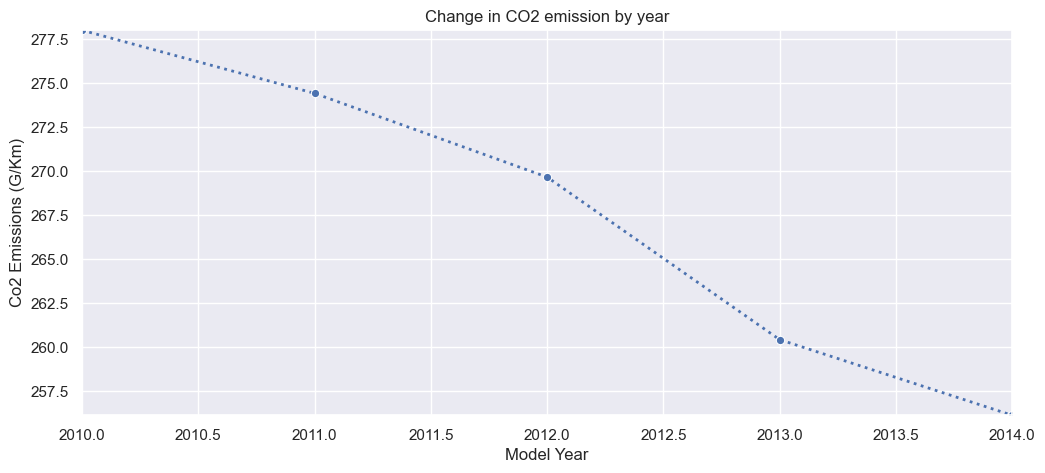

In [42]:
# Group the data by model year and calculate the mean for each year
year_mean = df.groupby('Model Year').mean()

# Create a figure with a specific size
plt.figure(figsize=(12,5))

# Plot the CO2 emissions by year
sns.lineplot(x=year_mean.index, y='Co2 Emissions (G/Km)', 
             data=year_mean, linestyle='dotted', linewidth=2, marker='o')

# Set the x-axis range using the original 'Model Year' column
plt.xlim(min(df['Model Year']), max(df['Model Year']))

# Set the y-axis range using the 'Co2 Emissions (G/Km)' column
plt.ylim(min(year_mean['Co2 Emissions (G/Km)']), max(year_mean['Co2 Emissions (G/Km)']))
plt.title('Change in CO2 emission by year')

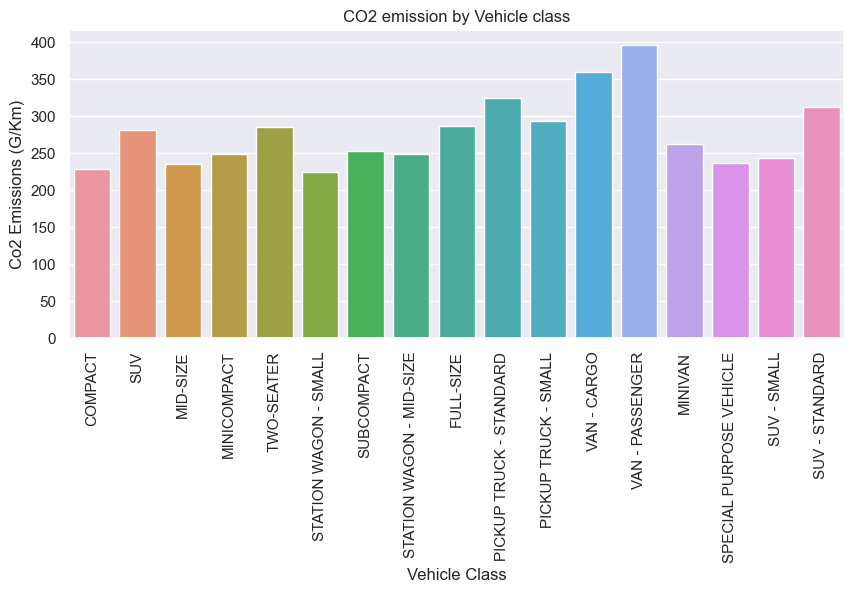

In [70]:
sns.barplot(x='Vehicle Class', 
                y='Co2 Emissions (G/Km)',data=df, errorbar=None)
plt.title('CO2 emission by Vehicle class')
plt.xticks(rotation=90);

### Multivariate Analysis <a class="anchor" id="8th-bullet"></a>

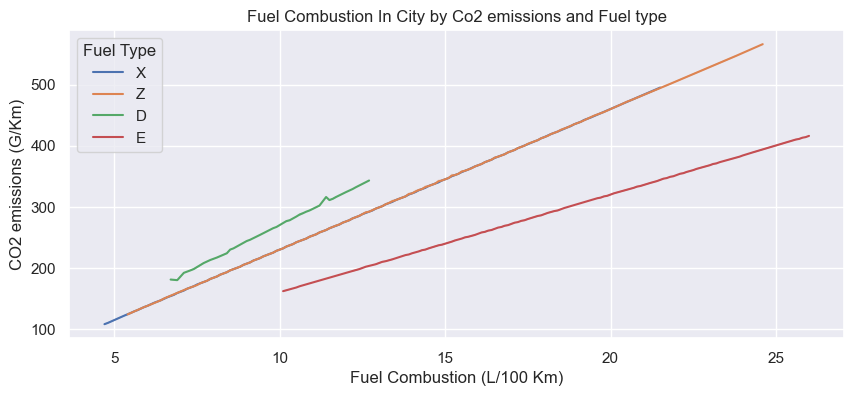

In [15]:
# plot relationship between Fuel consumption and Co2 emissions
sns.lineplot(x = 'Fuel Consumption Comb (L/100 Km)', 
            y = 'Co2 Emissions (G/Km)', hue='Fuel Type', data=df)
plt.title('Fuel Combustion In City by Co2 emissions and Fuel type')
plt.xlabel('Fuel Combustion (L/100 Km)')
plt.ylabel('CO2 emissions (G/Km)');

C:\Users\Chizzy\AppData\Local\Temp\ipykernel_7292\663108701.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_mean = df.groupby('Model Year').mean().reset_index()


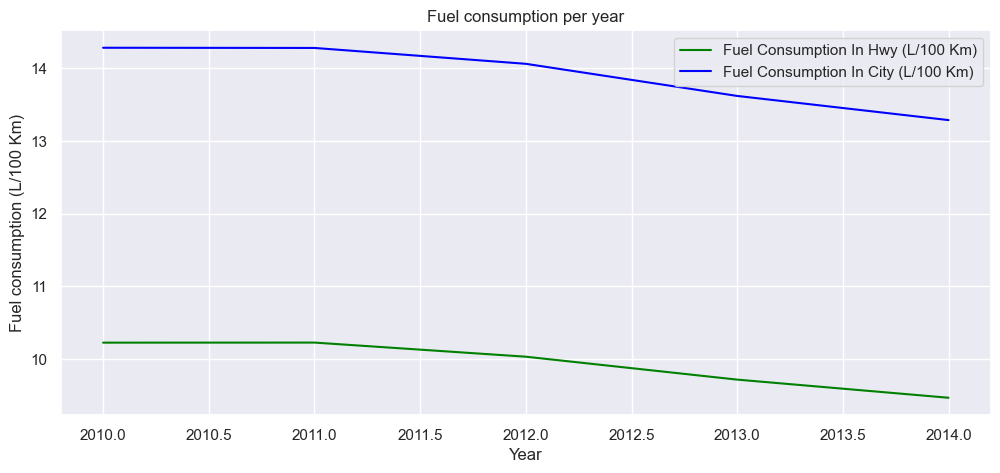

In [44]:
# Create a figure with a specific size
plt.figure(figsize=(12,5))

# Group the data by model year and calculate the mean for each year
year_mean = df.groupby('Model Year').mean().reset_index()

# Plot the fuel consumption in the highway and in the city by year
plt.plot(year_mean['Model Year'], year_mean['Fuel Consumption In Hwy (L/100 Km)'], color='green')
plt.plot(year_mean['Model Year'], year_mean['Fuel Consumption In City (L/100 Km)'], color='blue')
# plt.plot(year_mean['Model Year'], year_mean['Co2 Emissions (G/Km)'], color='red')

# Add plot labels
plt.title('Fuel consumption per year')
plt.xlabel('Year')
plt.ylabel('Fuel consumption (L/100 Km)')
plt.legend(['Fuel Consumption In Hwy (L/100 Km)', 'Fuel Consumption In City (L/100 Km)'])

Text(0.5, 1.0, 'Fuel Consumption by Engine Size')

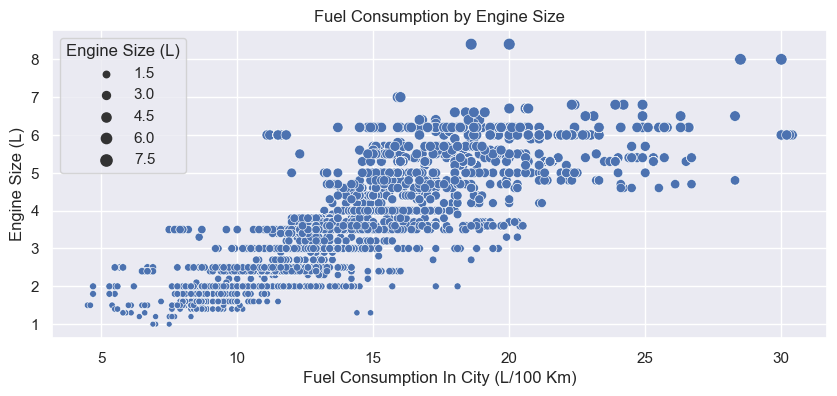

In [45]:
sns.scatterplot(x='Fuel Consumption In City (L/100 Km)', 
                y='Engine Size (L)', size='Engine Size (L)', data=df)
plt.title('Fuel Consumption by Engine Size')

## Model Development <a class="anchor" id="9th-bullet"></a>

In [46]:
# make a copy of the original dataset and filter to select only numeric data
df_copy = df
df_copy = df_copy.select_dtypes(exclude=['object'])

X = df_copy.drop(['Co2 Emissions (G/Km)'], axis =1)
y = df_copy['Co2 Emissions (G/Km)']

# split features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 45)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Regression Analysis <a class="anchor" id="10th-bullet"></a>

In [47]:
# create a list of model names
model_names = ['Lasso Regression', 'Gradient Boosting']

# create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'RMSE (Train)', 'MAE (Train)', 'R^2 (Train)', 'RMSE (Test)', 'MAE (Test)', 'R^2 (Test)'])

# create empty lists to store the predictions
y_pred_train_list = []
y_pred_test_list = []

# iterate through the list of models
for model_name in model_names:
    if model_name == 'Lasso Regression':
        # create and fit the model
        model = Lasso()
        model.fit(X_train, y_train)
        
        # make predictions on the training set
        y_pred_train = model.predict(X_train)
        y_pred_train_list.append(y_pred_train)

        # evaluate the model on the training set
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)

        # make predictions on the test set
        y_pred_test = model.predict(X_test)
        y_pred_test_list.append(y_pred_test)

        # evaluate the model on the test set
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        # store the results in the DataFrame
        results_df.loc[results_df.shape[0]] = [model_name, rmse_train, mae_train, r2_train, rmse_test, mae_test, r2_test]

    elif model_name == 'Gradient Boosting':
        # create and fit the model
        model = GradientBoostingRegressor()
        model.fit(X_train, y_train)

        # make predictions on the training set
        y_pred_train = model.predict(X_train)
        y_pred_train_list.append(y_pred_train)

        # evaluate the model on the training set
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)

        # make predictions on the test set
        y_pred_test = model.predict(X_test)
        y_pred_test_list.append(y_pred_test)
        
        # evaluate the model on the test set
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)

        # store the results in the DataFrame
        results_df.loc[results_df.shape[0]] = [model_name, rmse_train, mae_train, r2_train, rmse_test, mae_test, r2_test]


In [83]:
results_df

,Model,RMSE (Train),MAE (Train),R^2 (Train),RMSE (Test),MAE (Test),R^2 (Test)
0,Lasso Regression,22.648896,14.978805,0.875509,22.610093,15.251048,0.878176
1,Gradient Boosting,10.121209,4.982714,0.975140,11.655104,5.756155,0.967629


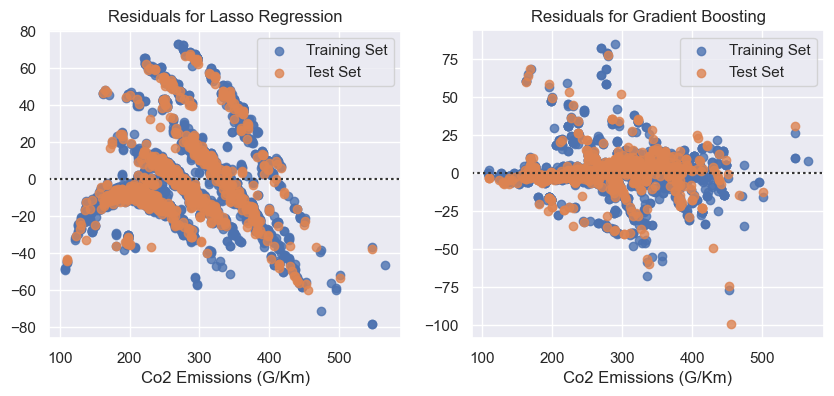

In [48]:
# create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# iterate through the list of models
for ax, model_name, y_pred_train, y_pred_test in zip(axs.flatten(), model_names, y_pred_train_list, y_pred_test_list):
    # plot the residuals for the training set
    sns.residplot(x= y_train, y =y_pred_train, ax=ax, label='Training Set')
    ax.set_title(f'Residuals for {model_name}')
    
    # plot the residuals for the test set
    sns.residplot(x=y_test, y=y_pred_test, ax=ax, label='Test Set')
    ax.set_title(f'Residuals for {model_name}')

# add legends
axs[0].legend()
axs[1].legend()

# show the plot
plt.show()

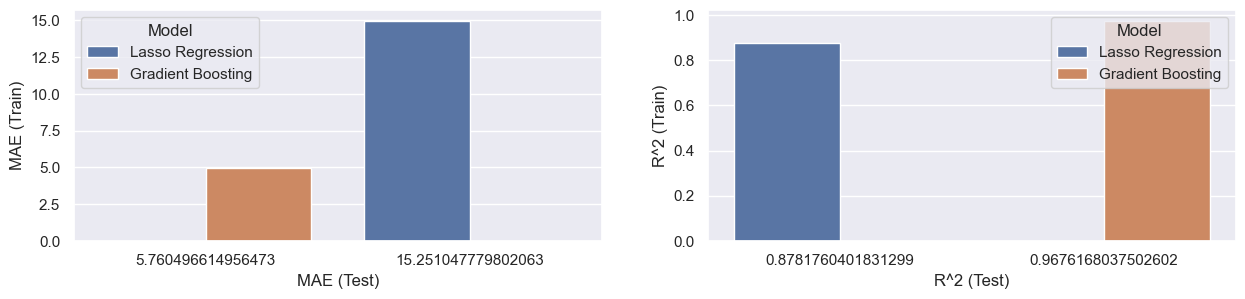

In [22]:
# create a figure with two rows and one column of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

# flatten the array of subplots to make it easier to iterate through
ax = ax.flatten()

# plot the first bar plot
sns.barplot(x='MAE (Test)', y='MAE (Train)', hue='Model', data=results_df, ax=ax[0])

# plot the second bar plot
sns.barplot(x='R^2 (Test)', y='R^2 (Train)', hue='Model', data=results_df, ax=ax[1])

# show the plot
plt.show()

### Classification Analysis <a class="anchor" id="11th-bullet"></a>

In [85]:
# assign each instance target to a list
targets = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

# encode the categorical columns
le = LabelEncoder()
df[targets] = df[targets].apply(le.fit_transform)

In [86]:
model = SVC()

# create an empty dataframe to store the outcomes
result = pd.DataFrame(columns=['Target', 'Accuracy (Train)', 'F1 Score (Train)', 'Accuracy (Test)', 'F1 Score (Test)'])

# iterate over the list of targets
for i in targets:
  # verify the target exists in the list
    if i in df.columns:
        # call the model and make the selected variable target and the remaining features
        X = df.drop([i], axis = 1)
        y = df[i]

        # split the data and fit the training set to model
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
        model.fit(X_train,y_train)

        # make prediction on train set and evaluate performance
        pred_train = model.predict(X_train)
        accuracy_train = accuracy_score(y_train,pred_train)
        f1_score_train = f1_score(y_train, pred_train, average = 'weighted')
       
      # make prediction on test set and evaluate performance  
        pred_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_test,pred_test)
        f1_score_test = f1_score(y_test, pred_test, average = 'weighted')
      
      # append outcome to the output dataframe
        result.loc[result.shape[0]] = [i, accuracy_train, f1_score_train, accuracy_test, f1_score_test]

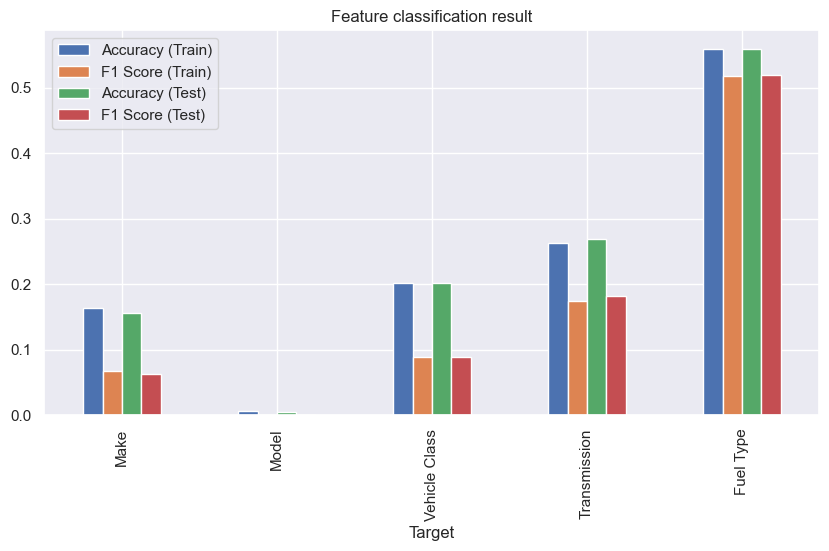

In [90]:
# plot outcome of the classification
result.plot(x = 'Target', figsize = (10, 5), grid = True, kind='bar')
plt.title('Feature classification result');

In [88]:
result

,Target,Accuracy (Train),F1 Score (Train),Accuracy (Test),F1 Score (Test)
0,Make,0.163284,0.066698,0.156716,0.062629
1,Model,0.006531,0.000085,0.004664,0.000043
2,Vehicle Class,0.202239,0.089219,0.202425,0.089204
3,Transmission,0.262888,0.174325,0.268657,0.181834
4,Fuel Type,0.559832,0.518474,0.558769,0.519402


### Clustering Analysis <a class="anchor" id="12th-bullet"></a>

In [28]:
df_copy = df_copy.drop(['Model Year'], axis=1)

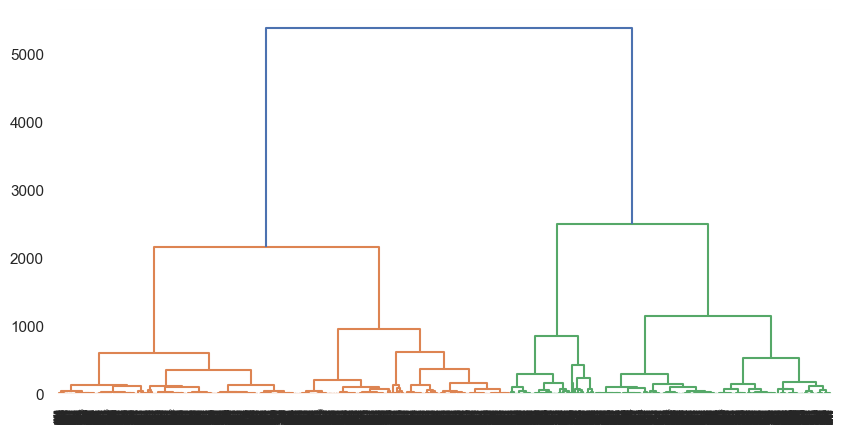

Optimum number of clusters: [ 476  553  211 ...   46  127 1191]


In [29]:
# compute the dendrogram
Z = linkage(df_copy, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

# calculate the optimum number of clusters
k = fcluster(Z, t=1, criterion='inconsistent')
print(f'Optimum number of clusters: {k}')

In [30]:
# create a KMeans model with the optimum number of clusters
model = KMeans(n_clusters=3)

# fit the data to the model
model.fit(df_copy)

# predict the cluster labels for the data
clusters = model.predict(df_copy)

In [41]:
# calculate the silhouette score
score = silhouette_score(df_copy, clusters)
cal_hs = calinski_harabasz_score(df_copy, clusters)
dav_bs = davies_bouldin_score(df_copy, clusters)

print(f'Silhouette score: {score:.3f}')
print(f'Calinski-Harabasz Score: {cal_hs:.3f}')
print(f'Davies-Bouldin Score: {dav_bs:.3f}')

Silhouette score: 0.543
Calinski-Harabasz Score: 12666.645
Davies-Bouldin Score: 0.558


C:\Users\Chizzy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Chizzy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Chizzy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


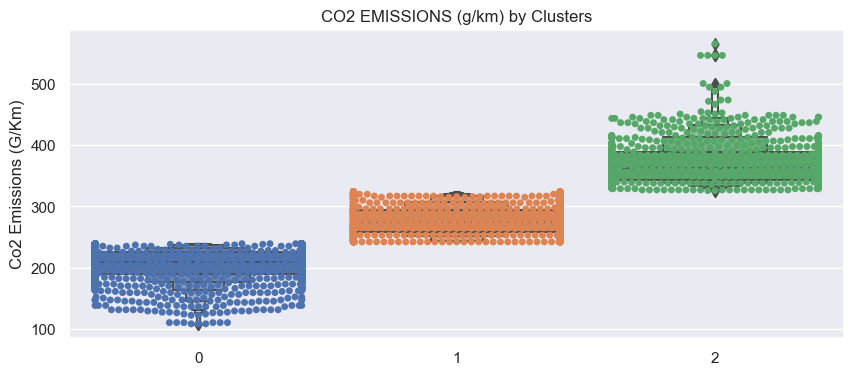

In [33]:
# plot clusters showing co2 emission
plt.figure()
pl=sns.swarmplot(x=clusters, y=df["Co2 Emissions (G/Km)"])
pl=sns.boxenplot(x=clusters, y=df["Co2 Emissions (G/Km)"])
plt.title('CO2 EMISSIONS (g/km) by Clusters')
plt.show()

In [34]:
# select the features to use for clustering
X = df[['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']]

# fit the K-means model and predict the cluster labels
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# calculate the silhouette score
silhouette_score = silhouette_score(X, labels, metric='euclidean')

# calculate the Calinski-Harabasz score
calinski_harabasz_score = calinski_harabasz_score(X, labels)

# calculate the Davies-Bouldin score
davies_bouldin_score = davies_bouldin_score(X, labels)

# print the evaluation scores
print(f'Silhouette Score: {silhouette_score:.3f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_score:.3f}')
print(f'Davies-Bouldin Score: {davies_bouldin_score:.3f}')

Silhouette Score: 0.593
Calinski-Harabasz Score: 21861.023
Davies-Bouldin Score: 0.511
